## Задание №3. Аппроксимация функций
Необходимо с помощью программной реализации метода наименьших квадратов по нормальным уравнениям и ортогональным многочленам построить алгебраический полином степени n наилучшего среднеквадратичного приближения функции $f(x)=x-sin(x)$ на отрезке [-1,1]

Импортируем библиотеки:

In [47]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matrix import matrices as mtx##матрицы
from Gauss import mGauss as mg##метод Гаусса

Задание функции:

In [48]:
def f(x):
    return x-np.sin(x)

Создание равноотстоящих узлов:

In [49]:
def create_x(n,a,b): ## равноотстоящие
    x = list()
    for i in range(n+1):
        x.append(a+(b-a)*i/n)
    return x

a,b=-1,1

Вычисление значений функции с "погрешностью":

In [50]:
def create_fluc_fun(x,f):
    y=list()
    for i in range(len(x)):
        y.append(f(x[i])+random.uniform(-1,1)*0.015)
    return y

Вычисление значения функции:

In [51]:
def create_y(x,f):
    y=list()
    for i in range(len(x)):
        y.append(f(x[i]))
    return y

Вычисление матрицы Вандермонда:

In [52]:
def create_Vandermonde(x,n):
    m=len(x)
    W=mtx(m,n,'ones')
    for i in range(m):
        for j in range(n):
            W.matrix[i][j]=x[i]**j
    return W

Метод наименьших квадратов (нормальные уравнения):

In [53]:
def LSM(x,y,n):
    m=len(x)
    W=create_Vandermonde(x,n+1)
    E=mtx(m,n+1,W.matrix.copy())
    W.transpose()
    Et=mtx(n+1,m,W.matrix.copy())
    E=Et.matmul(E)
    f=mtx(1,m,[y])
    f.transpose()
    f=Et.matmul(f)
    f.transpose()
    a=mg(n+1,E.matrix,f.matrix[0])
    def poly(t):
        ans=0
        for i in range(len(a)):
            ans+=a[i]*(t**i)
        return ans
    return poly

Вывод графиков и подсчет ошибки:

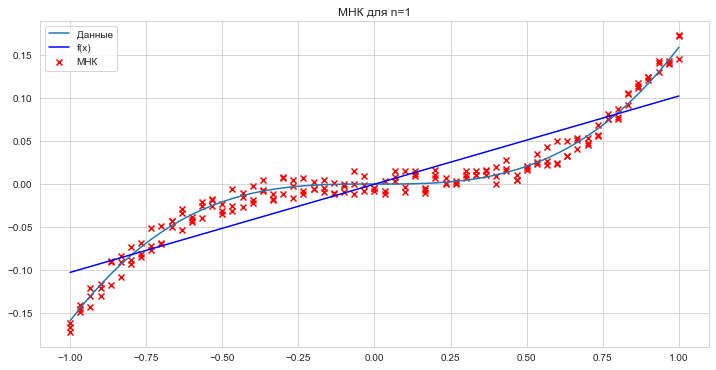

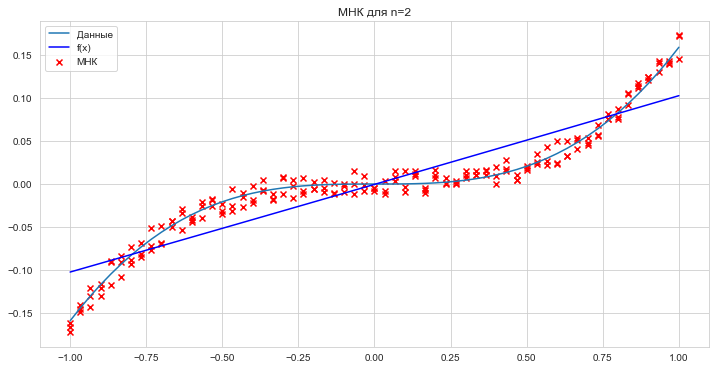

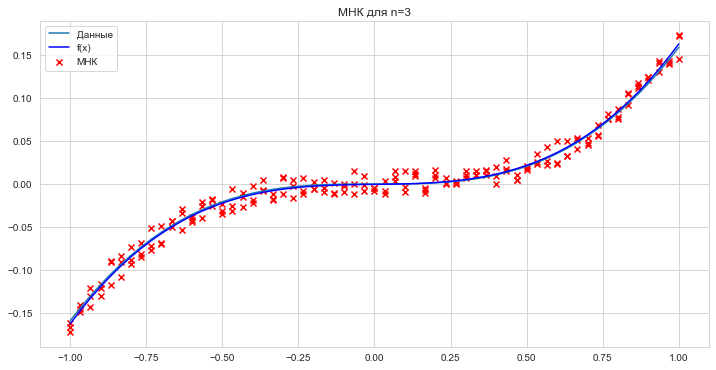

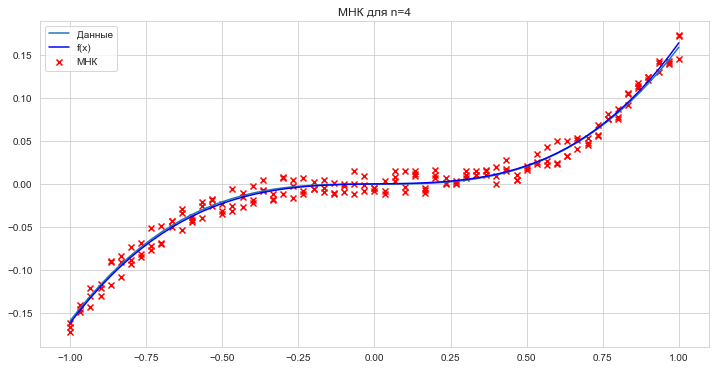

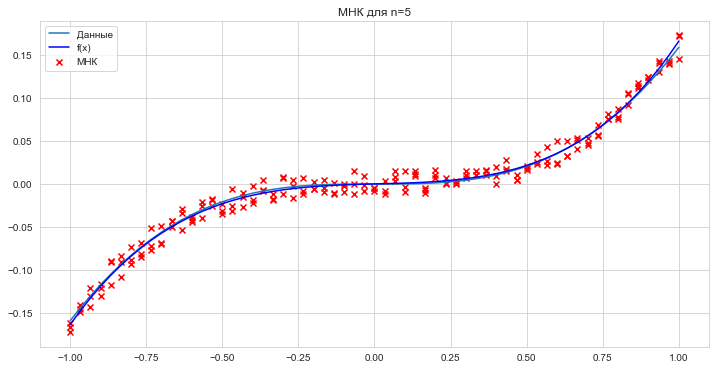

In [54]:
x=create_x(60,a,b)
z=x*3
y=create_fluc_fun(z,f)
sum1=[]
for i in range(1,6):
    temp=0
    poly=LSM(z,y,i)
    yapp=create_y(x,poly)
    for j in range(len(yapp)):
        temp+=(f(x[j])-yapp[j])**2
    sum1.append(temp)
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    plt.scatter(z,y,c='r',marker='x')
    plt.plot(x,f(x))
    plt.plot(x,yapp,c='b')
    plt.title('МНК для n='+str(i))
    plt.legend(['Данные','f(x)','МНК'])

Прописываем класс для МНК с ортогональными полиномами

In [55]:
class ortogonal():
    
    def __init__(self,x,y,n):
        self.x=x
        self.f=y
        self.n=n
        self.q=[]
        self.a=[]
        self.alpha_arr=[]
        self.beta_arr=[]
        self.q.append(lambda t: 1)
        def q1(t):
            sum=0
            for i in range(len(x)):
                sum+=x[i]
            return t - (1/len(x))*sum
        self.q.append(q1)

##Функция подсчета alpha        
    def alpha(self,j):
        sum1=0
        sum2=0
        for i in range(len(x)) :
            sum1+=self.x[i]*(self.q[j-1](self.x[i])**2)
            sum2+=self.q[j-1](self.x[i])**2
        return(sum1/sum2)

##функция подсчета beta
    def beta(self,j):
        sum1=0
        sum2=0
        for i in range(len(x)):
            sum1+=self.x[i]*self.q[j](self.x[i])*self.q[j-1](self.x[i])
            sum2+=self.q[j-1](x[i])**2
        return(sum1/sum2)

##построение j-го полинома
    def create_q(self,j,alpha,beta):
        def qj(t):
            return t*self.q[j-1](t)-alpha*self.q[j-1](t)-beta*self.q[j-2](t)
        return(qj)

##вычисление коэффициентов
    def create_a(self,j):
        sum1=0
        sum2=0
        for i in range(len(x)):
            sum1+=self.q[j](self.x[i])*self.f[i]
            sum2+=self.q[j](self.x[i])**2
        return sum1/sum2

##инициализация параметров
    def create_params(self):
        self.a.append(self.create_a(0))
        self.a.append(self.create_a(1)) 
        for j in range(2,self.n+1):
            self.alpha_arr.append(self.alpha(j))
            self.beta_arr.append(self.beta(j-1))   
            self.q.append(self.create_q(j,self.alpha_arr[j-2],self.beta_arr[j-2]))
            self.a.append(self.create_a(j))

##построение итоговой функции
    def create_func(self):
        def poly(t):
            ans=0
            for i in range(self.n+1):
                ans+=self.a[i]*self.q[i](t)
            return ans
        return poly

##увеличение степени
    def inc_deg(self):
        self.n+=1
        self.alpha_arr.append(self.alpha(self.n))
        self.beta_arr.append(self.beta(self.n-1))
        self.q.append(self.create_q(self.n,self.alpha_arr[-1],self.beta_arr[-1]))
        self.a.append(self.create_a(self.n))

Вывод графиков и подсчет ошибки:

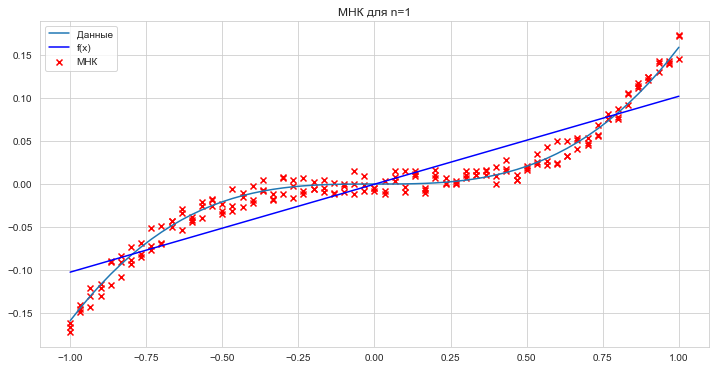

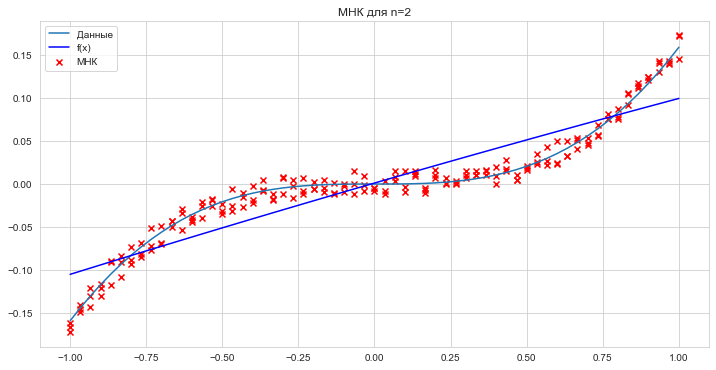

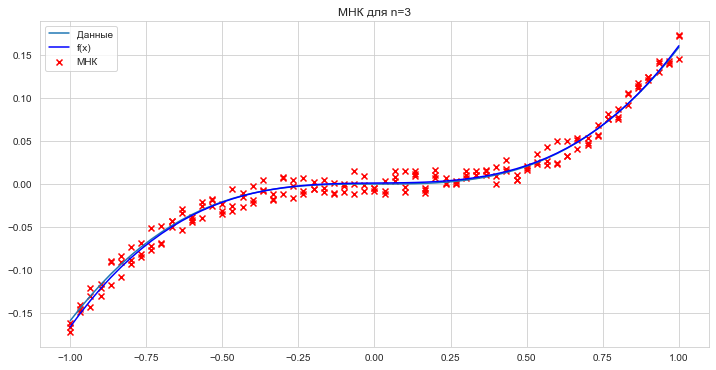

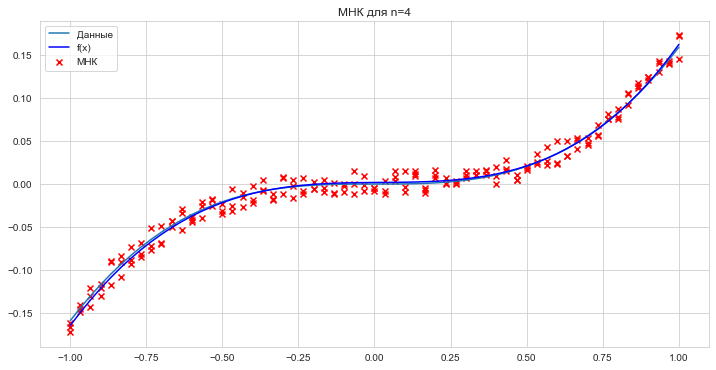

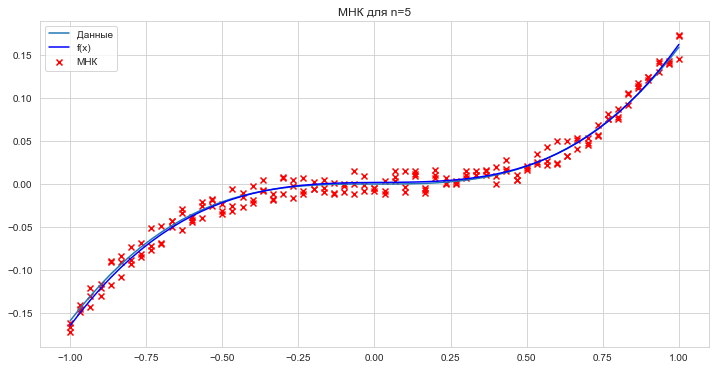

In [56]:
o=ortogonal(x,y,1)
o.create_params()
sum2=[]

for i in range(1,6):
    temp=0
    poly=o.create_func()
    yapp=create_y(x,poly)
    for j in range(len(yapp)):
        temp+=(f(x[j])-yapp[j])**2
    sum2.append(temp)
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    plt.scatter(z,y,c='r',marker='x')
    plt.plot(x,f(x))
    plt.plot(x,yapp,c='b')
    plt.title('МНК для n='+str(i))
    plt.legend(['Данные','f(x)','МНК'])
    o.inc_deg()

Вывод таблицы:

In [57]:
f_dict = {
        'Степень полинома': range(1,6),
        'Сумма квадратов ошибок для МНК(нормальные уравнения)': sum1 ,
        'Сумма квадратов ошибок для МНК(ортогональные полиномы)': sum2,
    }
pd.DataFrame(f_dict)

,Степень полинома,Сумма квадратов ошибок для МНК(нормальные уравнения),Сумма квадратов ошибок для МНК(ортогональные полиномы)
0,1,0.038127,0.038099
1,2,0.038129,0.038186
2,3,0.000160,0.000232
3,4,0.000172,0.000254
4,5,0.000241,0.000254
